# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [1]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [2]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [3]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [4]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [5]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [6]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [7]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [8]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [9]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [10]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [11]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position       Team  GF  GA Points
count         4          4   4   4      4
unique        4          4   3   4      4
top           3  Feyenoord  75  60     79
freq          1          1   2   1      1


In [12]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [13]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [14]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [15]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [16]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [17]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [18]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 




In [20]:
print(gene_expression.shape)
print(drug_response.shape)

(148, 238)
(148, 1)


In [21]:
from sklearn.model_selection import train_test_split 

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response)

# And check their shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(111, 238)
(37, 238)
(111, 1)
(37, 1)


In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy as np

# Create a pipeline
# It was tried with max_iter at default, at 10 000 and it finally converged at 100 000
model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(random_state=0, max_iter=100000))
])

# Create possible values for alpha ranging from 10^(-10) untill 10^(0)
alphas = np.logspace(-4, 0, 50)

# Create the parameter space
model_param_grid = {
    'lasso__alpha': alphas
}

# instantiate GridSearchCV
#TODO: is this a good scoring measure as the target is a log metric
search = GridSearchCV(
    model,
    model_param_grid,
    cv=5,
    scoring='neg_mean_squared_error', 
    verbose=1
)

# and find optimal alpha
search.fit(X_train,y_train)

# print best estimator
final_model = search.best_estimator_
print('Final model', final_model)

final_para = search.best_params_
print('Final parameters', final_para)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Final model Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0.2682695795279725, max_iter=100000,
                       random_state=0))])
Final parameters {'lasso__alpha': 0.2682695795279725}


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   43.7s finished


In [23]:
# Print the final coefficients
print("Number of inputs: {}".format(len(final_model['lasso'].coef_)))
print(final_model['lasso'].coef_)

Number of inputs: 238
[-0.          0.          0.          0.          0.          0.
 -0.          0.          0.         -0.         -0.         -0.
  0.         -0.         -0.          0.04628489 -0.          0.
 -0.         -0.          0.          0.         -0.          0.
  1.30995937  0.          0.         -0.         -0.          0.
  0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.          0.
  0.          0.         -0.          0.          0.          0.09426714
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.         -0.         -0.          0.         -0.
  0.         -0.         -0.         -0.          0.        

## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

The hyperparameter is optimized to the given data. Because the training set contains a part of the data it will be optimized to that specific part. So if the training data set is changed, it might lead to a different outcome for the hyperparameter. A smaller alpha will change the lasso coefficients so that it is more similar to a linear regression and a larger alpha will make more coefficients equal to 0. So a smaller alpha will lead to a larger selection of relevant features and a larger alpha a smaller selection of relevant features


<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>

Only if the regression will go through the origin, meaning that if x = 0 then y = 0 as well. This is not the expected relationship between RNA expression and drug response, so in this case the intercept shouldn't be shrunk to zero.


Best coeff 1.309959366154804


<AxesSubplot:xlabel='ABCB1', ylabel='RAMP1'>

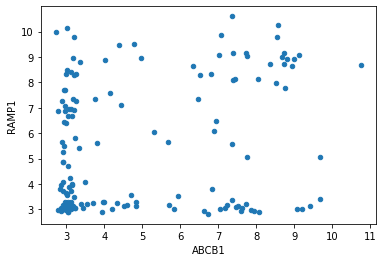

In [24]:
import matplotlib.pyplot as plt

final_model.fit(X_train, y_train)
coeffs = final_model['lasso'].coef_

index_sec = coeffs.argsort()[-2]
index_first = coeffs.argsort()[-1]
print('Best coeff', coeffs[index_first])
feature_1 = X_train.columns[index_first]
feature_2 = X_train.columns[index_sec]

gene_expression.plot(feature_1, feature_2, 'scatter')

## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>



In [58]:
# bootstrap
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error as MSE

# Reduce parameter space to increase speed
alphas = np.logspace(-2, 1, 30)#check

# Create the parameter space
# model_param_grid = {
#     'lasso__alpha': alphas
#}

# #TODO: is this a good scoring measure as the target is a log metric
# search = GridSearchCV(
#     model,
#     model_param_grid,
#     cv=4,#waarom 4?
#     scoring='neg_mean_squared_error', 
#     verbose=1
# )
#nieuwe for loop om makkelijker te plotten
MSE_per_alpha=np.zeros((30,100))
for i in range(len(alphas)):
    print(alphas[i])
    for j in range(100):
        # resample the data
        new_X, new_y = resample(X_train, y_train)#check

        
        # fit model with new data
        model=Lasso(alphas[i],normalize=False, tol=0.0001)#check
        model.fit(new_X,new_y)
        pred_Y=model.predict(X_test)
        MSE_per_alpha[i,j]=MSE(y_test,pred_Y)

        

0.01


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1591010931753074, tolerance: 0.09076018558558559
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5505320297254148, tolerance: 0.07724718810810811
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9992404736411185, tolerance: 0.08212102666666667
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5399729275744738, tolerance: 0.08030730432432434
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6002784592220693, tolerance: 0.08124009297297298
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5622901927262758, tolerance: 0.07012696756756757
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8152513926379421, tolerance: 0.07629191477477477
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2101074337849147, tolerance: 0.08561959963963964
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1100932885506984, tolerance: 0.07803614990990991
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.814994630465207, tolerance: 0.09916394666666668
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3176335571255973, tolerance: 0.06828536396396397
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7582649207575014, tolerance: 0.08602682774774775
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

0.0117210229753348


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8117353976634222, tolerance: 0.07859611855855855
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1957202747496667, tolerance: 0.08534973639639641
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1563613887516944, tolerance: 0.06795924342342342
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17260314428092927, tolerance: 0.056783171891891894
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8901567481214845, tolerance: 0.06340366396396396
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2937043584568624, tolerance: 0.07037547693693694
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge.

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5083347919062216, tolerance: 0.08230267027027029
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8512526900336133, tolerance: 0.07742197891891893
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.299878669866942, tolerance: 0.07931671297297299
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

0.01373823795883263


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3917965451094425, tolerance: 0.07000379693693694
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1150770184855157, tolerance: 0.09303810324324324
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1553497191830115, tolerance: 0.07963008108108109
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6293266031112643, tolerance: 0.08993421855855857
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2520871987962365, tolerance: 0.0718709563963964
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7123135191055499, tolerance: 0.08202036990990992
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1888541699534354, tolerance: 0.08284049189189188
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8732263963610492, tolerance: 0.09913605855855856
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.70868999040951, tolerance: 0.07232150990990992
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1750861497872853, tolerance: 0.07331321099099099
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2878933450796652, tolerance: 0.07493001099099099
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2486094290909628, tolerance: 0.08297988936936937
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

0.01610262027560939


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7668270725063964, tolerance: 0.0865267563963964
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.561058626352706, tolerance: 0.09284268270270271
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5292308381343207, tolerance: 0.08728942432432432
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4813736753205926, tolerance: 0.08206110108108108
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34989347014691763, tolerance: 0.0692088363963964
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6401613349399844, tolerance: 0.07345868972972974
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21672140703836829, tolerance: 0.11046095369369369
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4738653549412648, tolerance: 0.07727205963963965
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4396402810955333, tolerance: 0.07895934990990991
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. 

0.018873918221350976


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6802206395643975, tolerance: 0.09070126
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.37823831763386373, tolerance: 0.08352613693693695
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6323131267820068, tolerance: 0.06522782342342343
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7506339185793696, tolerance: 0.07961514432432433
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1649019491824064, tolerance: 0.07313924234234234
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47247650294750176, tolerance: 0.07250094702702703
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. 

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1984630841430917, tolerance: 0.07077951585585586
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.76844969713851, tolerance: 0.07443566972972973
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30712050840233096, tolerance: 0.0848448699099099
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5201187782987509, tolerance: 0.07768403027027028
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8470637680390065, tolerance: 0.06443547585585586
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8283467111593104, tolerance: 0.09425628774774776
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

0.022122162910704492


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.952499891094087, tolerance: 0.08434573585585586
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11434951784700953, tolerance: 0.07511981747747748
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0861568876803005, tolerance: 0.08345713693693693
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9574883716761695, tolerance: 0.08389745963963965
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5379091916905674, tolerance: 0.07660826936936938
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2524057419358967, tolerance: 0.0762233227027027
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3383698798538186, tolerance: 0.07137970396396398
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2689672458511625, tolerance: 0.09215201747747749
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24478633559448149, tolerance: 0.086797270990991
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

0.02592943797404667


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11537623164026112, tolerance: 0.06187616810810811
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9609329716674999, tolerance: 0.0814218855855856
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18142217257387916, tolerance: 0.0832282536936937
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8064508276209921, tolerance: 0.07628343423423424
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6525565776442215, tolerance: 0.08865436666666668
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5265587711888982, tolerance: 0.07261693477477477
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8049661984504921, tolerance: 0.089747730990991
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08827887199207618, tolerance: 0.07440296342342342
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.832257236658597, tolerance: 0.07552339585585585
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You

0.03039195382313198


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24572524579300214, tolerance: 0.07559898936936937
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1730255495074564, tolerance: 0.06661908774774775
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23068171704468554, tolerance: 0.05655272774774775
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge.

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14682745074337777, tolerance: 0.08822588324324325
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6409615475577306, tolerance: 0.0737039055855856
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28231560802515654, tolerance: 0.07093982936936936
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. 

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8224907749260968, tolerance: 0.10185980936936938
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.46123493118605685, tolerance: 0.08497144396396397
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.328940747194162, tolerance: 0.07567012324324325
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

0.035622478902624426


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9045161255583478, tolerance: 0.0856605455855856
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15945491955422453, tolerance: 0.07426147477477478
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21696947229163932, tolerance: 0.08611739909909909
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. 

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14867504243457352, tolerance: 0.08689346918918918
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11600066132100117, tolerance: 0.08837139693693694
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5930983480291241, tolerance: 0.08061724324324325
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge.

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27533897835915155, tolerance: 0.07763141675675676
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5104884784150174, tolerance: 0.0999425610810811
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32395783704039127, tolerance: 0.09082317189189189
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. 

0.041753189365604


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17675348316326023, tolerance: 0.08942078234234234
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23994491230451143, tolerance: 0.07509856936936937
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26637650789156275, tolerance: 0.07073547477477478
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07942069394745843, tolerance: 0.07122171297297297
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.860174955662071, tolerance: 0.07362010936936937
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1913112379484776, tolerance: 0.07319988774774774
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

0.04893900918477494


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3629766820142315, tolerance: 0.07103400270270271
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11127646203501129, tolerance: 0.07315129963963964
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19129621464474944, tolerance: 0.1027186318918919
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. 

C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2429326366093001, tolerance: 0.08753914432432433
  positive)


0.057361525104486784


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19538467929234216, tolerance: 0.07959717243243244
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11300209448715925, tolerance: 0.08113760936936937
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14214755669860324, tolerance: 0.09349633747747749
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge

0.06723357536499334


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22921245734553963, tolerance: 0.08143343693693696
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0975348010275372, tolerance: 0.08941779963963964
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10712104954958868, tolerance: 0.090257150990991
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

0.07880462815669913


C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17600957407763218, tolerance: 0.08259110432432433
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1863755217328169, tolerance: 0.09976111585585587
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1584578470831488, tolerance: 0.05912515477477478
  positive)
C:\Users\s140468\Anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. 

0.09236708571873861
0.10826367338740546
0.12689610031679222
0.1487352107293511
0.17433288221999882
0.20433597178569418
0.2395026619987486
0.2807216203941177
0.32903445623126676
0.38566204211634725
0.4520353656360243
0.5298316906283708
0.6210169418915616
0.727895384398315
0.8531678524172805
1.0


[1.89489373 1.8772181  2.01980499 2.11601439 2.12138318 1.86390327
 1.88872966 1.94588972 1.79367873 1.63514674 1.93363579 1.57197113
 1.5610422  1.39618696 1.50618778 1.4313829  1.39564514 1.47386658
 1.29829875 1.02733156 0.92108789 1.1076368  0.8853169  0.95081977
 0.85103999 0.76981113 0.62606682 0.64362439 0.53064449 0.49663958]


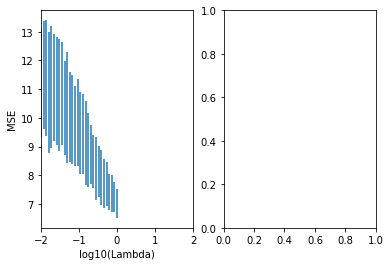

In [60]:



##to do: 
score_MSE=np.mean(MSE_per_alpha,axis=1)
sd_size=np.std(MSE_per_alpha,axis=1)
print(sd_size)

#Visualize
fig,ax=plt.subplots(1,2)
ax[0].errorbar(np.log10(alphas),score_MSE,yerr=sd_size,ls='None')
ax[0].set_ylabel('MSE')
ax[0].set_xlim([-2, 2])
ax[0].set_xlabel('log10(Lambda)')
plt.show()


## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>

In [46]:
import math
print(math.log(0.001))
print(math.exp(1.00000000e-04 ))
print(np.logspace(-4, 0, 30))



-6.907755278982137
1.0001000050001667
[1.00000000e-04 1.37382380e-04 1.88739182e-04 2.59294380e-04
 3.56224789e-04 4.89390092e-04 6.72335754e-04 9.23670857e-04
 1.26896100e-03 1.74332882e-03 2.39502662e-03 3.29034456e-03
 4.52035366e-03 6.21016942e-03 8.53167852e-03 1.17210230e-02
 1.61026203e-02 2.21221629e-02 3.03919538e-02 4.17531894e-02
 5.73615251e-02 7.88046282e-02 1.08263673e-01 1.48735211e-01
 2.04335972e-01 2.80721620e-01 3.85662042e-01 5.29831691e-01
 7.27895384e-01 1.00000000e+00]
1.0
